In [2]:
import pandas as pd
import sqlite3

In [3]:
#Establish connection with our database
dat = sqlite3.connect('20170509-bam-2.2m-Nja9G.sqlite') #connected to database with out error

#Querys 
dfSOURCE = pd.read_sql_query("SELECT * FROM modules", dat)
dfSCORES = pd.read_sql_query("SELECT * FROM scores", dat)

#Categorial values we will store, paintType emotion and content
paintType=['media_oilpaint','media_3d_graphics','media_pen_ink','media_comic'
           ,'media_vectorart','media_graphite','media_watercolor']

emotion=['emotion_gloomy','emotion_happy','emotion_peaceful','emotion_scary']
content=['content_bicycle','content_bird','content_building','content_cars','content_cat','content_dog','content_flower','content_people','content_tree']

#Store the categorical value that defines each img

dfSCORES['paintType']=dfSCORES[paintType].idxmax(axis=1)
dfSCORES['emotion']=dfSCORES[emotion].idxmax(axis=1)
dfSCORES['content']=dfSCORES[content].idxmax(axis=1)

dfSCORES['TOPpaintType']= dfSCORES[paintType].max(axis=1)
dfSCORES['TOPemotion']=dfSCORES[emotion].max(axis=1)
dfSCORES['TOPcontent']=dfSCORES[content].max(axis=1)


listC=['mid','paintType','emotion','content','TOPcontent','TOPemotion','TOPpaintType']
df=pd.merge(dfSOURCE, dfSCORES[listC], on =['mid'])

In [4]:
df.head()

,mid,project_id,src,mature_content,license,paintType,emotion,content,TOPcontent,TOPemotion,TOPpaintType
0,125829121,18589705,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc,media_oilpaint,emotion_happy,content_cars,-0.098892,-2.954691,-9.357111
1,34253483,4357109,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_oilpaint,emotion_happy,content_dog,-0.061217,-0.180663,-6.377277
2,88080407,7294129,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_vectorart,emotion_happy,content_people,-1.332626,-0.771889,-0.200894
3,16777240,2270370,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_comic,emotion_happy,content_people,-1.213955,-0.622210,-0.094686
4,62914589,8359181,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_pen_ink,emotion_gloomy,content_building,-1.464100,-0.186630,-3.132857


In [5]:
df.loc[df['mid']==88080407].values


array([[88080407, 7294129,
        'https://mir-s3-cdn-cf.behance.net/project_modules/disp/7fff587294129.562669fd41592.jpg',
        0.0, 'cc by-nc-nd', 'media_vectorart', 'emotion_happy',
        'content_people', -1.3326259851455688, -0.7718894481658936,
        -0.200894296169281]], dtype=object)

In [6]:
df=df.loc[df['TOPpaintType'] >= -1]
df=df.loc[df['TOPpaintType'] < 0]
df['paintType'].value_counts().plot(kind='bar')

In [92]:
df.head()

,mid,project_id,src,mature_content,license,paintType,emotion,content,TOPcontent,TOPemotion,TOPpaintType
2,88080407,7294129,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_vectorart,emotion_happy,content_people,-1.332626,-0.771889,-0.200894
3,16777240,2270370,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_comic,emotion_happy,content_people,-1.213955,-0.622210,-0.094686
7,165642275,25133993,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc,media_oilpaint,emotion_scary,content_people,-3.774166,-2.027744,-0.067937
13,44385137,5649529,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_vectorart,emotion_happy,content_bird,-0.374019,-0.475146,-0.375955
14,102848379,14954375,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc,media_watercolor,emotion_happy,content_people,-0.398193,-1.316395,-0.205539


In [7]:
df = df.reset_index(drop=True)
listC=['mid','src','paintType','emotion','content']
df=df[listC]
df.loc[0]['src']

'https://mir-s3-cdn-cf.behance.net/project_modules/disp/7fff587294129.562669fd41592.jpg'

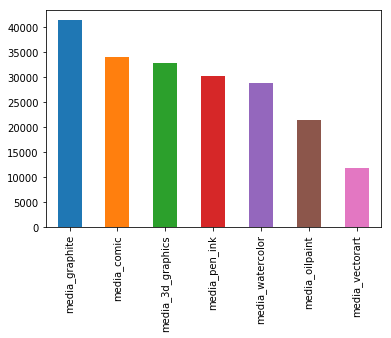

In [52]:
for u in paintType:
    aux=df.loc[df['paintType'] == u]
    samples=len(aux)-30000 
    if(samples<0):
        samples=0
    df.drop(aux.sample(samples,replace=True).index,inplace=True)


df['paintType'].value_counts().plot(kind='bar')

In [93]:
df = df.reset_index(drop=True)

In [94]:
df.loc[40].values

array([65837489, 8179437,
       'https://mir-s3-cdn-cf.behance.net/project_modules/disp/01202c8179437.560c3bab76c3f.jpg',
       0.0, 'cc by-nc-nd', 'media_watercolor', 'emotion_scary',
       'content_people', -0.8239389061927795, -1.6682102680206299,
       -0.15342605113983154], dtype=object)

In [9]:
df.index

RangeIndex(start=0, stop=1020251, step=1)

In [13]:
import requests
import os
from multiprocessing import Pool

for type in paintType:
    if not os.path.exists(type):
        os.mkdir(type)

def downloadFromSrc(u):
    row = df.loc[u]
    imgClass = row['paintType'] + '/'
    url = row['src']
    filename = imgClass+str(u)+'.jpg'
    result = requests.get(url, stream=True)
    if result.status_code == 200:
        if not os.path.exists(imgClass):
            os.mkdir(imgClass)
        image = result.raw.read()
        open(filename,"wb").write(image)

pool = Pool()
pool.map(downloadFromSrc, range(len(df)))         


Process ForkPoolWorker-5:
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-4:
Process ForkPoolWorker-6:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Use

KeyboardInterrupt: 

  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/jiwidi/anaconda3/lib/python3.6/multiprocessing/queues

In [14]:
for type in paintType:
    print("Images in {0}: {1}".format(type,len(os.listdir(type+'/'))))

Images in media_oilpaint: 17918
Images in media_3d_graphics: 20360
Images in media_pen_ink: 15057
Images in media_comic: 22246
Images in media_vectorart: 16604
Images in media_graphite: 15548
Images in media_watercolor: 12766
